In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Academic_Performance.csv')

In [3]:
df.head()

STUDENT_ID GENDER PLACEMENT HONOR_OPTED_OR_NOT EDUCATION_TYPE  \
0  SB11201210000129      F       Yes                Yes       ACADEMIC   
1  SB11201210000137      F       Yes                Yes       ACADEMIC   
2  SB11201210005154      M        No                Yes       ACADEMIC   
3  SB11201210007504      F       Yes                Yes       ACADEMIC   
4  SB11201210007548      M       Yes                Yes       ACADEMIC   

         ACADEMIC_PROGRAM  COURSE 1 MARKS  COURSE 2 MARKS  COURSE 3 MARKS  \
0  INDUSTRIAL ENGINEERING            71.0            93.0            71.0   
1  INDUSTRIAL ENGINEERING            97.0            38.0            86.0   
2  ELECTRONIC ENGINEERING            17.0             1.0            18.0   
3  INDUSTRIAL ENGINEERING            65.0            35.0            76.0   
4  INDUSTRIAL ENGINEERING            94.0            94.0            98.0   

   COURSE 4 MARKS  COURSE 5 MARKS  PERCENTILE OVEARLL_GRADE  
0            93.0            79.0          91   FIRST CLASS  
1            98.0            78.0          92   THIRD CLASS  
2            43.0            22.0           7   DISTINCTION  
3            80.0            48.0          67   FIRST CLASS  
4           100.0            71.0          98   FIRST CLASS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT_ID          12411 non-null  object 
 1   GENDER              12389 non-null  object 
 2   PLACEMENT           12396 non-null  object 
 3   HONOR_OPTED_OR_NOT  12397 non-null  object 
 4   EDUCATION_TYPE      12396 non-null  object 
 5   ACADEMIC_PROGRAM    12377 non-null  object 
 6   COURSE 1 MARKS      12400 non-null  float64
 7   COURSE 2 MARKS      12403 non-null  float64
 8   COURSE 3 MARKS      12397 non-null  float64
 9   COURSE 4 MARKS      12397 non-null  float64
 10  COURSE 5 MARKS      12389 non-null  float64
 11  PERCENTILE          12411 non-null  int64  
 12  OVEARLL_GRADE       12411 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [5]:
##Finding null values
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [6]:
##No need of id column
df.drop('STUDENT_ID',axis=1,inplace=True)

In [7]:
df.shape

(12411, 12)

In [8]:
def setNullValues(df):
    data = df.copy()
    for col in data.columns:
        if (data[col].isnull().sum() > 0):
            if(data[col].dtypes == 'O'):
                modeVal = data[col].mode()[0]
                data[col] = data[col].fillna(modeVal)
            else:
                avgVal = data[col].mean()
                data[col] = data[col].fillna(avgVal)

    return data

In [9]:
df = setNullValues(df)

In [10]:
df.isnull().sum()

GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64

<Axes: >

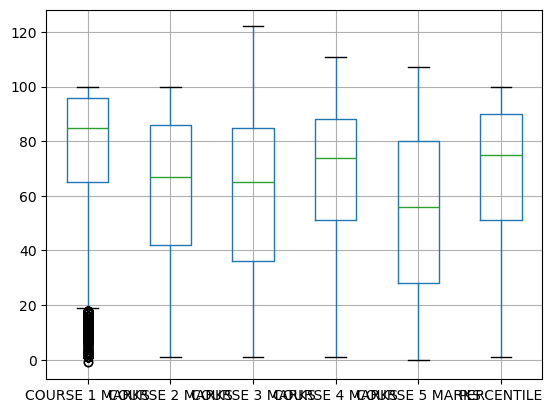

In [11]:
df.boxplot()

In [12]:
q1 = df['COURSE 1 MARKS'].quantile(0.25)
q3 = df['COURSE 1 MARKS'].quantile(0.75)

In [13]:
iqr = q3 - q1

In [14]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [15]:
df = df[df['COURSE 1 MARKS'] > lower_limit]
df = df[df['COURSE 1 MARKS'] < upper_limit]

In [17]:
##Data Transformation

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [51]:
ct = ColumnTransformer(transformers=[
    (
        'trf1',
        OneHotEncoder(sparse_output=False,drop='first'),
        ['GENDER','PLACEMENT','HONOR_OPTED_OR_NOT','EDUCATION_TYPE','ACADEMIC_PROGRAM']
    ),
    ('trf2',OrdinalEncoder(categories=[['FIRST CLASS','SECOND CLASS','THIRD CLASS','DISTINCTION']]),['OVEARLL_GRADE'])
],remainder='passthrough')

In [53]:
pd.DataFrame(ct.fit_transform(df),columns=ct.get_feature_names_out())

trf1__GENDER_M  trf1__PLACEMENT_Yes  trf1__HONOR_OPTED_OR_NOT_Yes  \
0                 0.0                  1.0                           1.0   
1                 0.0                  1.0                           1.0   
2                 0.0                  1.0                           1.0   
3                 1.0                  1.0                           1.0   
4                 0.0                  1.0                           1.0   
...               ...                  ...                           ...   
12112             1.0                  1.0                           1.0   
12113             1.0                  1.0                           1.0   
12114             1.0                  1.0                           0.0   
12115             0.0                  1.0                           1.0   
12116             1.0                  0.0                           0.0   

       trf1__EDUCATION_TYPE_Not apply  trf1__EDUCATION_TYPE_TECHNICAL  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
12112                             0.0                             0.0   
12113                             0.0                             0.0   
12114                             0.0                             0.0   
12115                             0.0                             0.0   
12116                             0.0                             0.0   

       trf1__EDUCATION_TYPE_TECHNICAL/ACADEMIC  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
12112                                      0.0   
12113                                      0.0   
12114                                      0.0   
12115                                      0.0   
12116                                      0.0   

       trf1__ACADEMIC_PROGRAM_AUTOMATION ENGINEERING  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
12112                                            0.0   
12113                                            0.0   
12114                                            0.0   
12115                                            0.0   
12116                                            0.0   

       trf1__ACADEMIC_PROGRAM_CATASTRAL ENGINEERING AND GEODESY  \
0                                                    0.0          
1                                                    0.0          
2                                                    0.0          
3                                                    0.0          
4                                                    0.0          
...                                                  ...          
12112                                                0.0          
12113                                                0.0          
12114                                                0.0          
12115                                                0.0          
12116                                                0.0          

       trf1__ACADEMIC_PROGRAM_CHEMICAL ENGINEERING  \
0                                              0.0   
1                             

In [49]:
ct.get_feature_names_out()

array(['trf1__GENDER_F', 'trf1__GENDER_M', 'trf1__PLACEMENT_No',
       'trf1__PLACEMENT_Yes', 'trf1__HONOR_OPTED_OR_NOT_No',
       'trf1__HONOR_OPTED_OR_NOT_Yes', 'trf1__EDUCATION_TYPE_ACADEMIC',
       'trf1__EDUCATION_TYPE_Not apply', 'trf1__EDUCATION_TYPE_TECHNICAL',
       'trf1__EDUCATION_TYPE_TECHNICAL/ACADEMIC',
       'trf1__ACADEMIC_PROGRAM_AERONAUTICAL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_AUTOMATION ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_CATASTRAL ENGINEERING AND GEODESY',
       'trf1__ACADEMIC_PROGRAM_CHEMICAL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_CIVIL CONSTRUCTIONS',
       'trf1__ACADEMIC_PROGRAM_CIVIL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_CONTROL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_ELECTRIC ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_ELECTRIC ENGINEERING AND TELECOMMUNICATIONS',
       'trf1__ACADEMIC_PROGRAM_ELECTROMECHANICAL ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_ELECTRONIC ENGINEERING',
       'trf1__ACADEMIC_PROGRAM_INDU